In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Visualize the distribution of the nine features


In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

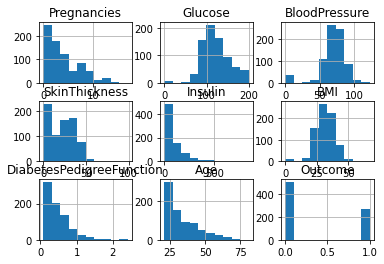

In [5]:
df.hist()
plt.show()

#### Notes

- Age: mostly 20-30
- BMI, Bloodpreasure, Glucose normally distributed
- Glucose shows extreme values
- BMI, Bloodpreasure, Glucose: Missing values?
- Pregnancies: maybe a few outliners
- features are on different scales


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

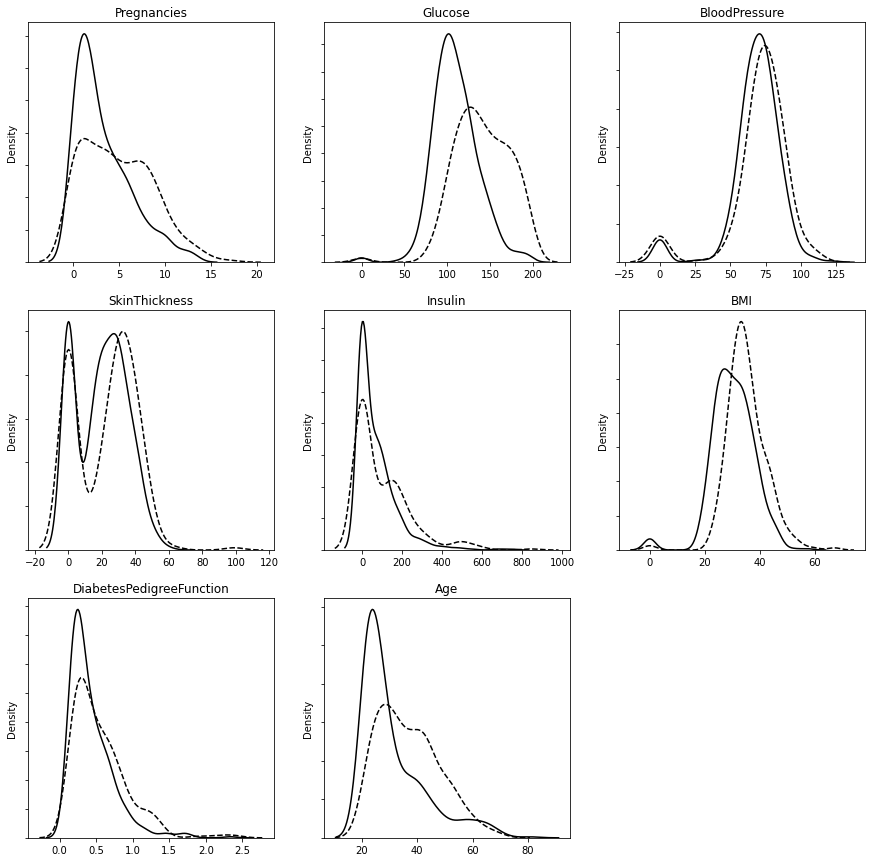

In [6]:
# subplot of 3x3
plt.subplots(3,3,figsize=(15,15))

# Plot a density plot for each feature
for idx, col in enumerate(df.columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel=False,
                kde_kws={'linestyle':'-', 'color':'black', 'label':"No Diabetes"})
    sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel=False,
                kde_kws={'linestyle':'--', 'color':'black', 'label':"Diabetes"})
    ax.set_title(col)
    
# Hide the 9th subplot since there are only 8 plots
plt.subplot(3,3,9).set_visible(False)

plt.show()

#### Notes

- Glucose: among the non-diabetics the curve has a normal distribution, centered around the value 100. Diabetics centered around 150.
- similiar to BMI and Age
- BloodPreasure, SkinThickness: No significant difference

# Data Preprocessing

## Handling missing values

In [7]:
print(df.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [8]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

#### Notes

- Glucose, BloodPreasure, SkinThickness, Insulin have missing values, because they should never be 0

In [9]:
print('Number of rows with 0 values')
for col in df.columns:
    missing_rows = df.loc[df[col] == 0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [10]:
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)


In [11]:
print('Number of rows with 0 values')
for col in df.columns:
    missing_rows = df.loc[df[col] == 0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [12]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [13]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

## Standardize Data

In [14]:
from sklearn import preprocessing

In [15]:
df_scaled = preprocessing.scale(df)

In [16]:
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)

In [17]:
df_scaled['Outcome'] = df['Outcome']
df = df_scaled

In [18]:
print(df.describe().loc[['mean', 'std','max'],].round(2).abs())

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
mean         0.00     0.00            0.0           0.00     0.00  0.00   
std          1.00     1.00            1.0           1.00     1.00  1.00   
max          3.91     2.54            4.1           7.95     8.13  5.04   

      DiabetesPedigreeFunction   Age  Outcome  
mean                      0.00  0.00     0.35  
std                       1.00  1.00     0.48  
max                       5.88  4.06     1.00  


# Split data


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']

In [21]:
# First split to create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
# Second split to create training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
test_size=0.2)

# Model building with Neural Networks

In [23]:
from keras.models import Sequential
from keras.layers import Dense

In [24]:
# we are creating the NN step by step
model = Sequential()

2022-12-18 13:30:27.165083: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [25]:
# Add first layer
model.add(Dense(256, activation='relu', input_dim = 8))

In [26]:
# Add second hidden layer
model.add(Dense(128, activation='relu'))

In [27]:
# Add output layer
model.add(Dense(1, activation='sigmoid'))

In [28]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',
             metrics=['binary_accuracy'])

## Train the model

In [29]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    batch_size=256,
                    epochs=100)

2022-12-18 13:30:27.591786: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
2/2 [==============================] - 1s 249ms/step - loss: 0.6618 - binary_accuracy: 0.6314 - val_loss: 0.5977 - val_binary_accuracy: 0.7805
Epoch 2/100
2/2 [==============================] - 0s 40ms/step - loss: 0.5995 - binary_accuracy: 0.7495 - val_loss: 0.5465 - val_binary_accuracy: 0.7805
Epoch 3/100
2/2 [==============================] - 0s 40ms/step - loss: 0.5526 - binary_accuracy: 0.7576 - val_loss: 0.5087 - val_binary_accuracy: 0.7886
Epoch 4/100
2/2 [==============================] - 0s 41ms/step - loss: 0.5187 - binary_accuracy: 0.7637 - val_loss: 0.4829 - val_binary_accuracy: 0.7805
Epoch 5/100
2/2 [==============================] - 0s 43ms/step - loss: 0.4964 - binary_accuracy: 0.7617 - val_loss: 0.4670 - val_binary_accuracy: 0.7805
Epoch 6/100
2/2 [==============================] - 0s 40ms/step - loss: 0.4800 - binary_accuracy: 0.7617 - val_loss: 0.4592 - val_binary_accuracy: 0.7967
Epoch 7/100
2/2 [==============================] - 0s 41ms/step - loss: 0.4

In [30]:
scores = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

16/16 [==============================] - 0s 2ms/step - loss: 0.2123 - binary_accuracy: 0.9206
Training Accuracy: 92.06%

5/5 [==============================] - 0s 3ms/step - loss: 0.5186 - binary_accuracy: 0.7857
Testing Accuracy: 78.57%



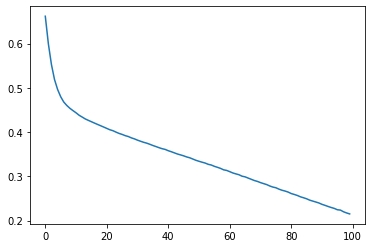

In [31]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

## Visualize

In [32]:
from sklearn.metrics import roc_curve

y_test_pred_probs = model.predict(X_test)

In [33]:
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)


Text(0, 0.5, 'True Positive Rate')

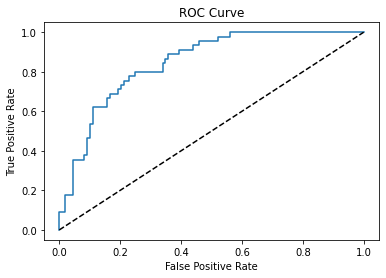

In [34]:
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')